In [3]:
import pandas as pd
import numpy as np

In [4]:
x_train = pd.read_csv('./CNC_data/X_train.csv',header=None)
y_train = pd.read_csv('./CNC_data/Y_train.csv',header=None)
x_test = pd.read_csv('./CNC_data/X_test.csv',header=None)
y_test = pd.read_csv('./CNC_data/Y_test.csv',header=None)


In [5]:
# 독립변수 + 종속변수 합체
train = pd.concat( (x_train,y_train), axis=1)
test = pd.concat( (x_test,y_test), axis=1)

In [6]:
a = pd.concat([x_train, y_train], axis=1)
b = pd.concat([x_test, y_test], axis=1)
c = pd.concat([a, b], axis=0)

In [7]:
print(train.shape, test.shape )

(18806, 50) (13242, 50)


In [8]:
# 데이터는 info, describe, duplicate().sum(), isnull().sum()

In [9]:
# 수치형 데이터.. 타입은 통일
train = train.astype('float32')
train.info()  # 결측치유무 및 데이터 타입 , 문자형 데이터...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18806 entries, 0 to 18805
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       18806 non-null  float32
 1   1       18806 non-null  float32
 2   2       18806 non-null  float32
 3   3       18806 non-null  float32
 4   4       18806 non-null  float32
 5   5       18806 non-null  float32
 6   6       18806 non-null  float32
 7   7       18806 non-null  float32
 8   8       18806 non-null  float32
 9   9       18806 non-null  float32
 10  10      18806 non-null  float32
 11  11      18806 non-null  float32
 12  12      18806 non-null  float32
 13  13      18806 non-null  float32
 14  14      18806 non-null  float32
 15  15      18806 non-null  float32
 16  16      18806 non-null  float32
 17  17      18806 non-null  float32
 18  18      18806 non-null  float32
 19  19      18806 non-null  float32
 20  20      18806 non-null  float32
 21  21      18806 non-null  float32
 22

In [10]:
pd.options.display.max_columns = None
train.describe()  # 대략적인 이상치..(중위수와 평균의 차이가 심하면)  28	29	30	31
train.loc[:,28:31]
test.loc[:,28:31]
# 28 ~ 31 컬럼의 데이터를 제거
train.drop(columns=range(28,32),inplace=True)
test.drop(columns=range(28,32),inplace=True)

In [11]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [12]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,0,1
count,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,1.847100e+04,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,1.847100e+04,18471.000000,18471.000000,1.847100e+04,18471.000000,18471.000000,18471.00000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,1.847100e+04,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000,18471.000000
mean,167.104919,3.657258,4.601810,167.102997,3.666107,4.615390,-0.530923,5.987708e-02,326.629211,8.293551,0.000834,109.421112,3.472681,5.382021,109.417015,3.495143,6.983369,-0.068362,5.800303e-02,325.848999,7.356544,8.949139e-04,60.062599,3.620385,4.21693,60.059479,3.621237,4.273017,-182.566437,37.846764,4.139744,-182.286560,37.438690,4.520113,12.558701,5.559274e-01,323.274048,69.331100,0.105362,16.016621,1.011532,37.820908,23.178713,3.941746,0.497158,0.502842
std,20.508844,6.584226,103.724289,20.510719,6.595662,87.345558,4.186035,4.495646e-02,1.653914,9.999435,0.002054,30.929148,6.941749,98.625114,30.928070,6.937653,97.612518,4.490234,5.461800e-02,2.380755,10.777850,2.724459e-03,36.332985,8.366410,68.57972,36.330585,8.361186,64.846390,1101.998169,23.920511,29.177246,1102.030396,24.131054,6.798485,11.427203,4.888262e-01,4.820406,58.171783,0.090602,0.858535,0.567126,43.086308,20.566805,2.604558,0.500005,0.500005
min,144.000000,-17.299999,-1275.000000,144.000000,-17.000000,-997.000000,-23.400000,2.780000e-19,320.000000,0.000000,-0.006060,75.400002,-29.700001,-1255.000000,75.400002,-29.400000,-997.000000,-27.799999,2.680000e-19,319.000000,0.000000,-4.920000e-03,30.500000,-48.500000,-1255.00000,30.500000,-47.000000,-997.000000,-2147.000000,2.980000,-147.000000,-2147.000000,3.000000,2.999999,-8.280000,0.000000e+00,290.000000,0.000000,-0.002960,15.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,150.000000,2.250000,-21.000000,150.000000,2.247500,3.000000,-3.455000,2.260000e-02,325.000000,1.360000,0.000000,82.800003,2.975000,-9.500000,82.800003,3.000000,3.000000,-1.800000,1.790000e-02,324.000000,1.080000,0.000000e+00,32.500000,3.000000,-1.25000,32.500000,3.000000,3.000000,-1107.000000,5.000000,-8.000000,-1107.000000,5.000000,3.000000,0.213000,2.760000e-19,319.000000,0.000000,0.000000,15.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000
50%,161.000000,4.000000,4.000000,161.000000,4.000000,4.000000,-0.582000,5.490000e-02,327.000000,4.970000,0.000022,99.000000,4.000000,4.000000,99.000000,4.000000,4.000000,0.061100,3.260000e-02,326.000000,2.990000,8.720000e-07,34.700001,4.000000,4.00000,34.700001,4.000000,4.000000,-218.000000,56.299999,4.060000,-217.000000,56.299999,4.000000,17.100000,8.150000e-01,323.000000,116.000000,0.156000,16.000000,1.000000,20.000000,15.000000,4.000000,0.000000,1.000000
75%,180.500000,5.050000,28.000000,180.500000,5.000000,5.000000,1.730000,9.150000e-02,328.000000,10.900000,0.000661,128.800003,5.000000,17.500000,128.800003,5.000000,5.000000,1.770000,9.300000e-02,326.000000,9.510000,4.735000e-04,78.349998,5.000000,9.25000,78.349998,5.000000,5.000000,569.250000,57.500000,17.312500,569.250000,57.299999,5.000000,21.900000,9.500000e-01,327.000000,119.000000,0.182000,17.000000,1.000000,73.000000,50.000000,7.000000,1.000000,1.000000
max,203.000000,55.299999,1444.000000,203.000000,55.000000,1005.000000,27.100000,3.800000e-01,331.000000,75.400002,0.038800,163.000000,55.299999,1465.000000,163.000000,55.000000,1005.000000,30.700001,4.300000e-01,333.000000,76.800003,4.240000e-02,124.000000,55.900002,1273.00000,124.000000,55.000000,1005.000000,2155.000000,58.599998,153.000000,2155.000000,58.299999,105.000000,75.400002,3.160000e+00,332.000000,130.000000,0.569000,17.000000,4.000000,135.0

In [13]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,0,1
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,1.091000e+04,10910.000000,10910.000000,10910.000000,10910.000000,10910.0,10910.000000,10910.000000,10910.000000,10910.0,10910.0
mean,158.359303,4.415334,4.069441,158.357424,4.414872,4.118211,-0.392352,0.071363,327.196609,8.244581,0.000565,95.604322,4.361587,5.225144,95.601054,4.364678,4.969012,-0.011750,0.070230,325.948854,7.283891,0.000582,41.524331,4.401865,4.005740,41.523061,4.402413,4.634895,-35.400246,50.462469,4.946459,-35.024557,50.176943,4.825298,17.362431,7.575403e-01,322.462695,98.073208,0.144532,16.586984,1.0,54.433089,11.624473,4.085793,1.0,0.0
std,12.575006,4.096955,73.550630,12.573422,4.087408,43.806136,4.345487,0.030928,1.147451,7.080805,0.001512,19.210744,4.221948,58.489713,19.208180,4.236082,49.452432,4.634254,0.044199,1.155420,7.753024,0.002080,20.639215,6.227996,60.489914,20.635179,6.239585,55.572591,1241.772657,17.255207,33.740165,1241.799045,17.594844,4.706814,8.647640,3.609745e-01,3.659671,43.579913,0.067220,0.809635,0.0,42.510368,16.678759,2.524201,0.0,0.0
min,144.000000,-15.300000,-1115.000000,144.000000,-14.900000,-891.000000,-22.200000,0.014200,321.000000,0.021400,-0.002260,75.400000,-29.700000,-795.000000,75.400000,-29.400000,-870.000000,-27.800000,0.012400,320.000000,0.038900,-0.001580,30.700000,-47.100000,-1255.000000,30.700000,-47.000000,-997.000000,-2147.000000,2.996000,-120.000000,-2147.000000,3.000000,2.999999,-7.460000,2.690000e-19,295.000000,0.000000,-0.002830,15.000000,1.0,0.000000,3.000000,0.000000,1.0,0.0
25%,149.000000,2.250000,-29.350000,149.000000,2.171500,3.516250,-4.170000,0.050600,327.000000,3.980000,0.000001,80.800000,3.025000,-13.800000,80.700000,3.000000,3.490000,-3.700000,0.029600,326.000000,2.420000,0.000000,32.700000,4.950000,-1.250000,32.700000,5.000000,5.000000,-1075.000000,56.300000,-16.000000,-1075.000000,56.300000,4.999999,15.800000,7.720000e-01,320.000000,115.000000,0.147000,17.000000,1.0,14.000000,3.000000,2.000000,1.0,0.0
50%,156.000000,4.875000,5.000000,156.000000,5.000000,5.000000,-0.939000,0.071000,327.000000,7.940000,0.000311,93.300000,4.975000,5.000000,93.250000,5.000000,5.000000,0.220000,0.069400,326.000000,6.230000,0.000023,33.700000,5.000000,5.000000,33.700000,5.000000,5.000000,-40.250000,58.300000,4.750000,-39.750000,58.300000,5.000000,19.500000,8.700000e-01,322.000000,117.000000,0.167000,17.000000,1.0,54.000000,3.000000,4.000000,1.0,0.0
75%,164.000000,5.950000,36.300000,164.000000,6.000000,5.000000,3.610000,0.092100,327.000000,9.960000,0.000554,106.000000,5.125000,23.800000,106.000000,5.002796,5.000000,3.700000,0.097500,326.000000,9.600000,0.000512,34.700000,5.000000,11.250000,34.700000,5.000000,5.000000,963.750000,58.400000,26.386875,963.750000,58.300000,5.000000,22.600000,9.500000e-01,324.000000,119.000000,0.183000,17.000000,1.0,90.000000,6.000000,6.000000,1.0,0.0
max,203.000000,50.300000,1105.000000,203.000000,49.700000,899.000000,19.500000,0.343000,330.000000,75.400000,0.028700,163.000000,31.425000,1015.000000,163.000000,31.495000,880.000000,29.400000,0.430000,329.000000,72.700000,0.027400,124.000000,55.900000,1235.000000,124.000000,55.000000,1005.000000,2155.000000,58.700000,144.000000,2155.000000,58.300000,105.000000,70.300000,3.020000e+00,330.000000,130.000000,0.524000,17.000000,1.0,133.000000,50.000000,8.000000,1.0,0.0


In [14]:
train.drop(columns=44,inplace=True)
test.drop(columns=44,inplace=True)

<AxesSubplot:>

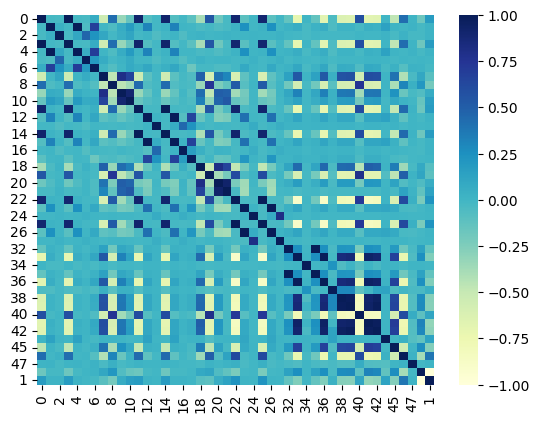

In [15]:
import seaborn as sns
# 상관계수를 heatmap으로 
sns.heatmap(train.corr(),cmap = 'YlGnBu')
# help(sns.heatmap)

In [16]:
train.shape, test.shape

((18471, 45), (10910, 45))

<AxesSubplot:>

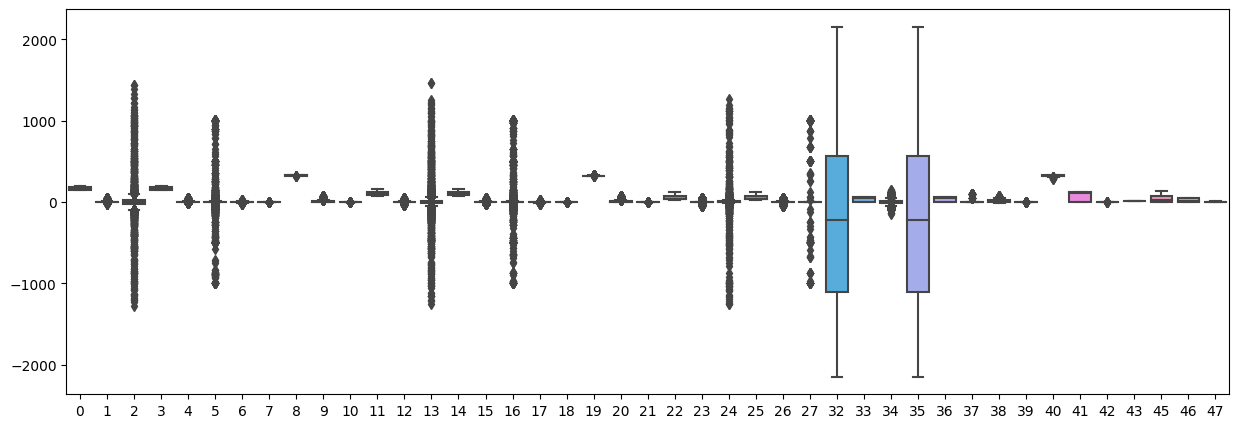

In [17]:
# 데이터 표준화  센서.. 이상치 존재할 확률이 높다.  실제로도 높다. 그래서 RobustScaler 이용해서 데이터를 표준화
# boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5 ) )
sns.boxplot(train.iloc[:, :-2])
# help(sns.boxplot)

In [18]:
x_train = train.iloc[:,:-2]
y_train = train.iloc[:,-2:]
x_test = test.iloc[:,:-2]
y_test = test.iloc[:,-2:]
from sklearn.preprocessing import RobustScaler

<AxesSubplot:>

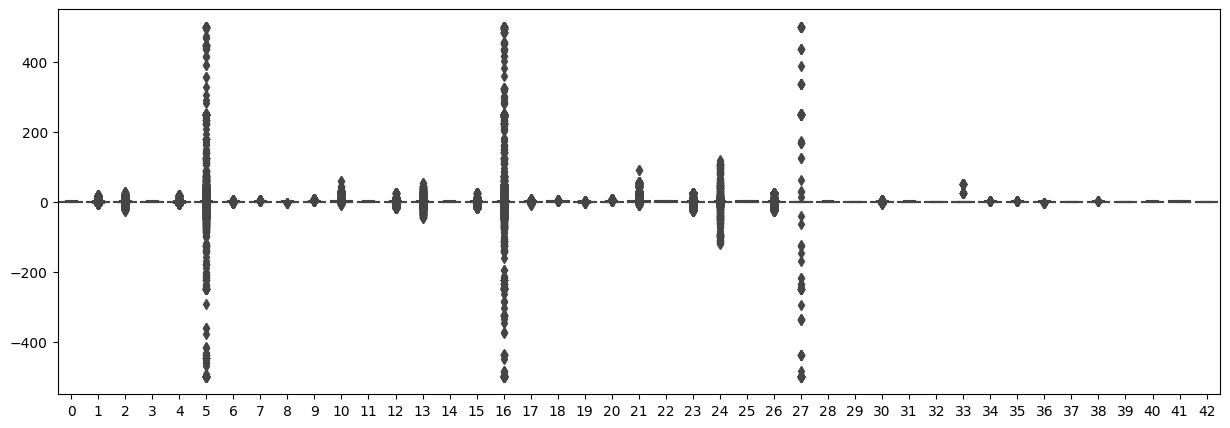

In [19]:
rs =  RobustScaler()
x_train_scaled =  rs.fit_transform(x_train)
x_test_scaled =  rs.fit_transform(x_test)
plt.figure(figsize=(15,5 ) )
sns.boxplot(x_train_scaled)

In [20]:
# 모델 파라메터 신경망   FC , CNN  LSTM
nb_class  =2
batch_size = 1024
epochs = 300
lr = 1e-4   # 0.0001   미세조정방식   0.001 ~ 0.0001 사이에 값으로 조정

In [21]:
# 자유롭게 ai 모델을 생성하고 평가
# 정확률, 정밀도, 재현율  - confusion matrix
# 옵티마이져는 Adam or RmsProp 둘중에 적당한것
# 학습결과 시각화

In [22]:
import tensorflow as tf
from tensorflow.keras import layers

In [23]:
# 신경망 모델 설계
model = tf.keras.models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(x_train_scaled.shape[1],))) 
model.add(layers.Dropout(0.25))
model.add(layers.Dense(256,activation='relu' ))
model.add(layers.Dropout(0.25))          
model.add(layers.Dense(512,activation='relu' ))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512,activation='relu' ))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(256,activation='relu' ))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128,activation='relu' ))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(nb_class,activation='sigmoid' ))

In [24]:
x_train_scaled.shape[1], x_test_scaled.shape[1]

(43, 43)

In [ ]:
model.compile(loss=tf.keras.losses.binary_crossentropy
              , optimizer = tf.keras.optimizers.Adam(learning_rate=lr), metrics=['acc'])
callbacks = [
    # tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint('nn_cnc.keras',save_best_only=True)
]
hist = model.fit(x_train_scaled,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test_scaled,y_test)
          ,callbacks=callbacks )

Epoch 1/300
19/19 [==============================] - 2s 71ms/step - loss: 0.8674 - acc: 0.5014 - val_loss: 15389.3574 - val_acc: 0.0000e+00
Epoch 2/300
19/19 [==============================] - 1s 45ms/step - loss: 0.8027 - acc: 0.5179 - val_loss: 6580.0176 - val_acc: 0.1529
Epoch 3/300
19/19 [==============================] - 1s 57ms/step - loss: 0.7570 - acc: 0.5368 - val_loss: 5112.3311 - val_acc: 0.3291
Epoch 4/300
19/19 [==============================] - 1s 49ms/step - loss: 0.7461 - acc: 0.5469 - val_loss: 4235.0957 - val_acc: 0.4190
Epoch 5/300
19/19 [==============================] - 1s 32ms/step - loss: 0.7357 - acc: 0.5590 - val_loss: 4319.8823 - val_acc: 0.4305
Epoch 6/300
19/19 [==============================] - 1s 43ms/step - loss: 0.7301 - acc: 0.5705 - val_loss: 3550.9001 - val_acc: 0.4962
Epoch 7/300
19/19 [==============================] - 1s 42ms/step - loss: 0.7180 - acc: 0.5802 - val_loss: 3541.5156 - val_acc: 0.5053
Epoch 8/300
19/19 [==============================]

In [ ]:
model.evaluate(x_test_scaled,y_test)

In [ ]:
saved_model = tf.keras.models.load_model('nn_cnc.keras')
saved_model.evaluate(x_test_scaled,y_test)